## Linear Logistic Regression Binary Classifier Implementation and Demonstration 

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogReg import *
%matplotlib inline

### Generate Data, split into train and test sets

In [162]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=1000, n_features=2, 
                           centers=2, cluster_std=3.50, random_state=1)
Dtrain, Dtest, train_labs, test_labs = train_test_split(data, labels, test_size=0.25, random_state=42)

Xtrain = Dtrain[:,0]
Ytrain = Dtrain[:,1]
Xtest = Dtest[:,0]
Ytest = Dtest[:,1]

### Illustration of classification target data in 2D 

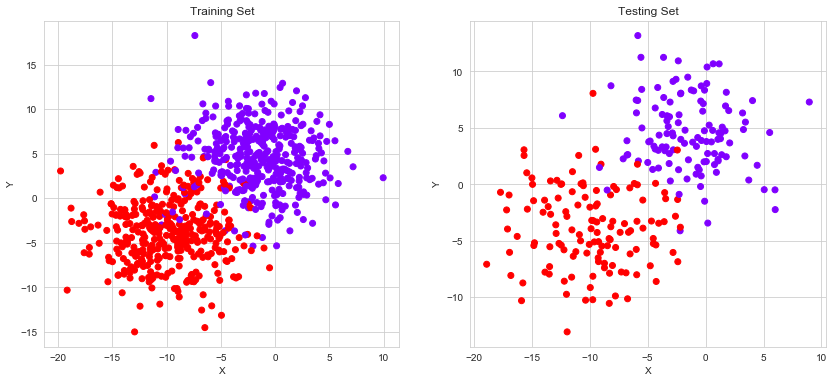

In [163]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,6))
p1 = plt.subplot(121, title = 'Training Set')
plt.scatter(Xtrain , Ytrain, c = train_labs, cmap='rainbow')
plt.ylabel('Y')
plt.xlabel('X')

p2 = plt.subplot(122, title = 'Testing Set')
plt.scatter(Xtest , Ytest, c = test_labs, cmap='rainbow')
plt.xlabel('X')
plt.ylabel('Y')

### Invoke home brewed functions to  train and test

In [164]:
Train = add_bias(Dtrain)
Test = add_bias(Dtest)
theta = train(Train ,y = train_labs, num_iters=3000)
#theta = train_sgd(Train ,y = train_labs, num_iters=1000, batch_frac=0.5)

pred_train = test(Train, theta)
pred_test = test(Test, theta)

fit_train = - np.dot(Train,theta)/theta[2] + Ytrain
fit_test = - np.dot(Test,theta)/theta[2] + Ytest

### Visually illustrate how it works including desicion boundary on both training and testing sets

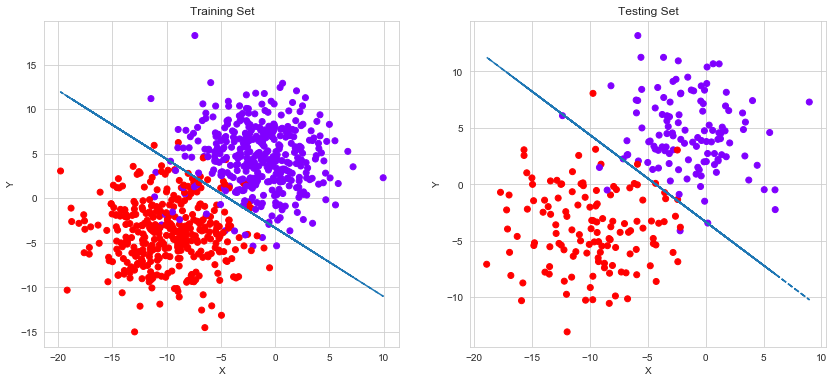

In [165]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,6))
p1 = plt.subplot(121, title = 'Training Set')
plt.scatter(Xtrain , Ytrain, c = train_labs, cmap='rainbow')
plt.plot(Xtrain, fit_train,'--')
plt.ylabel('Y')
plt.xlabel('X')

p2 = plt.subplot(122, title = 'Testing Set')
plt.scatter(Xtest , Ytest, c = test_labs, cmap='rainbow')
plt.plot(Xtest, fit_test,'--')
plt.xlabel('X')
plt.ylabel('Y')

### Check prediction accuracies

In [166]:
getAccuracy(labels=train_labs, pred_labels = pred_train,method="class")

0.9546666666666667

In [167]:
getAccuracy(labels=test_labs, pred_labels = pred_test,method="class")

0.964

## Let's try non-linear desicion boundary

Here I just add a few more polynomials to x1 to get non-linear decisian boundary.

$ \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_1 x_2 = 0 $

This equation is simple enough to solve analytically! 

$ \mathbf{x_{fit} = \frac{\theta^T \cdot X}{\theta_2 + \theta_4*x_1} - x_2}$


In [174]:
#add more polynomials
Dt = np.concatenate((Dtrain,Dtrain[:,[0]]**2, Dtrain[:,[0]]* Dtrain[:,[1]]),axis=1)
Dte = np.concatenate((Dtest,Dtest[:,[0]]**2, Dtest[:,[0]]* Dtest[:,[1]]),axis=1)

In [175]:
#add bias unit
Train = add_bias(Dt)
Test = add_bias(Dte)

#train and optimal weights
theta = train(Train ,y = train_labs, num_iters=3000)

#make predictions on training and test sets
pred_train = test(Train, theta)
pred_test = test(Test, theta)

In [176]:
#calculate desision boundary
fit_train = - np.dot(Train,theta)/(theta[2] + theta[4]*Xtrain)  + Ytrain
fit_test = - np.dot(Test,theta)/(theta[2] + theta[4]*Xtest) + Ytest

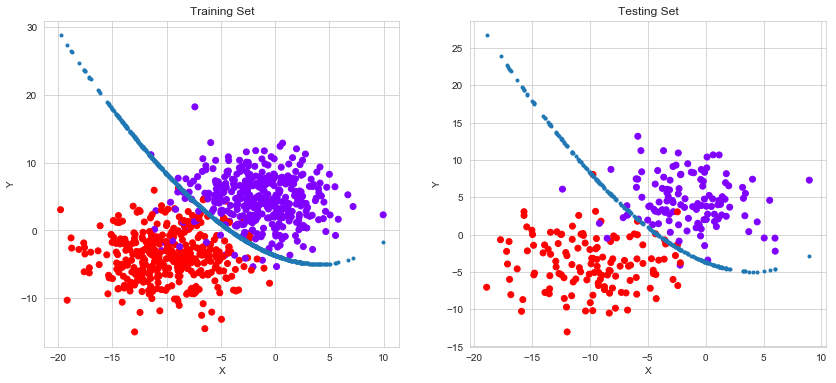

In [177]:
#plot results
sns.set_style("whitegrid")
fig = plt.figure(figsize=(14,6))
p1 = plt.subplot(121, title = 'Training Set')
plt.scatter(Xtrain , Ytrain, c = train_labs, cmap='rainbow')
plt.plot(Xtrain, fit_train,'.')
plt.ylabel('Y')
plt.xlabel('X')

p2 = plt.subplot(122, title = 'Testing Set')
plt.scatter(Xtest , Ytest, c = test_labs, cmap='rainbow')
plt.plot(Xtest, fit_test,'.')
plt.xlabel('X')
plt.ylabel('Y')

In [178]:
getAccuracy(labels=train_labs, pred_labels = pred_train,method="class")

0.9533333333333334

In [179]:
getAccuracy(labels=test_labs, pred_labels = pred_test,method="class")

0.96